# **An Analysis of Meteorites: More Than Just Rocks in Space?**

*By Elizabeth Slesarev*

# **Introduction**

---


> Don't confuse meteors with meteorites! 

> "Like meteorites, meteors are objects that enter Earth's atmosphere from space. But meteors—which are typically pieces of comet dust no larger than a grain of rice—burn up before reaching the ground. ... The term “meteorite” refers only to those bodies that survive the trip through the atmosphere and reach Earth's surface." -[AMNH](https://www.amnh.org/explore/news-blogs/on-exhibit-posts/meteor-meteorite-asteroid)

> In this tutorial I will be going over some of python's most useful libraries and tools when it comes to analyzing coordinates or metoerite impact sites. We will also cover some ML methods to analyze our chosen datasets to futher develop and test a hypothesis regarding any patterns or relationships we may find.

> We will display the phenomena of meterotie landing locations as well as determine if meteorites truly stem from supernovas. 





>*All relevant files, images, and databases will be contained within this repo on GitHub.*

> *Information on DBScan: https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea*

> *Information on KMeans: https://medium.datadriveninvestor.com/weighted-k-means-clustering-of-gps-coordinates-python-7c6270846163*

> *Information on Linear Regression: https://machinelearningmastery.com/linear-regression-for-machine-learning/*

> *Information on meteorites: https://www.amnh.org/explore/news-blogs/on-exhibit-posts/meteor-meteorite-asteroid*

> *Information on databases, libraries, and any other methods will be linked as introduced below. *


# **Getting Started...**

For this project, we will begin by importing the basics such as [numpy](https://numpy.org/doc/), [pandas](https://pandas.pydata.org/docs/), and [matplotlib](https://matplotlib.org/) to name a few...

In [249]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

> We will be collecting data from two sources: [NASA's Meteorite Landings Databse](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) which holds data on meteorite landings dating back to the year 1409. The databse is a smaller version (ending at year 2013) of the [The Meteoritical Society's](https://meteoritical.org/) more up-to-date one which holds landings up to present time.


> The second source will be parsed from later on in the tutorial, is a databse containing all identified supernovas (from quite a bit ago) up to the present time. Hosted by SNE Space, this [Databse](https://sne.space/) contains relevant information about when supernovas occured. 


All my databses will be imported using CSV files, for ease of parsing. It can be noted that both databses do not operate with any APIs and data is stored in tabular form on each respective website.

In [250]:
df = pd.read_csv('Meteorite_Landings.csv', index_col=0)

# dropping all null rows to handle smaller sample size
df = df.dropna() 



> For this dataset, we will be handling these columns: 



>**name**: meteorite name

> **id**: unique meteorite ID tag

> **recclass**: classification of meteorite based on size and other factors

> **mass (g)**: weight of the meteorite on Earth


> **fall**: if meteorite fell and impacted Earth


> **year**: datetime of year and date the meteorite impacted Earth


> **rectlat**: latitude of impact site 
> **reclong**: longitude of impact site


















# **Cleaning Up Our Data**

> Here we will parse out the day, month, and time out of the year column because we do not care to look at impacts in such high detail. We will worry about years only for now (which will also be useful for when we import the supernova database).

> We will then limit the data to years 1901+ as it is more relevant data.

In [251]:
y = list()

for index, row in df.iterrows():
  y.append(row['year'][6:10])

df['years'] = y
df["years"] = pd.to_numeric(df["years"])

df = df.loc[df.years > 1900]

df.head()

id nametype     recclass  ...    reclong           GeoLocation years
name                                 ...                                       
Aarhus      2    Valid           H6  ...   10.23333  (56.18333, 10.23333)  1951
Abee        6    Valid          EH4  ... -113.00000    (54.21667, -113.0)  1952
Acapulco   10    Valid  Acapulcoite  ...  -99.90000     (16.88333, -99.9)  1976
Achiras   370    Valid           L6  ...  -64.95000   (-33.16667, -64.95)  1902
Adhi Kot  379    Valid          EH4  ...   71.80000          (32.1, 71.8)  1919

[5 rows x 10 columns]

# **Now that we have cleaned up our first dataset, let's do some analysis on it!**

> For this set, we will visually display a map using [folium](http://python-visualization.github.io/folium/). Let's create a new column that will host the descriptions of each meteorite. 

> We will define description as the meteorite name and size in (g). 

In [252]:
# for the map description, lets add a description column
df['Description'] = "Mass: " + df['mass (g)'].astype(str) + ", Name: " + df.index.values.astype(str)
df

id nametype  ... years                    Description
name                        ...                                     
Aarhus          2    Valid  ...  1951      Mass: 720.0, Name: Aarhus
Abee            6    Valid  ...  1952     Mass: 107000.0, Name: Abee
Acapulco       10    Valid  ...  1976   Mass: 1914.0, Name: Acapulco
Achiras       370    Valid  ...  1902     Mass: 780.0, Name: Achiras
Adhi Kot      379    Valid  ...  1919   Mass: 4239.0, Name: Adhi Kot
...           ...      ...  ...   ...                            ...
Zillah 002  31356    Valid  ...  1990  Mass: 172.0, Name: Zillah 002
Zinder      30409    Valid  ...  1999       Mass: 46.0, Name: Zinder
Zlin        30410    Valid  ...  1939          Mass: 3.3, Name: Zlin
Zubkovsky   31357    Valid  ...  2003  Mass: 2167.0, Name: Zubkovsky
Zulu Queen  30414    Valid  ...  1976  Mass: 200.0, Name: Zulu Queen

[37393 rows x 11 columns]

# **Creating df_fell**

> Since we know "Fell" represents meteorites that have impacted Earth, we will only map out data with these coordinates in mind.

> We will create a sub dataframe using this specified information (as we will continue to use the main dataframe with "Found" meteorites for future analysis)

In [253]:
df_fell = df[(df['fall'] == 'Fell')]
df_fell

id nametype  ... years                        Description
name                          ...                                         
Aarhus            2    Valid  ...  1951          Mass: 720.0, Name: Aarhus
Abee              6    Valid  ...  1952         Mass: 107000.0, Name: Abee
Acapulco         10    Valid  ...  1976       Mass: 1914.0, Name: Acapulco
Achiras         370    Valid  ...  1902         Mass: 780.0, Name: Achiras
Adhi Kot        379    Valid  ...  1919       Mass: 4239.0, Name: Adhi Kot
...             ...      ...  ...   ...                                ...
Zemaitkiemis  30399    Valid  ...  1933  Mass: 44100.0, Name: Zemaitkiemis
Zhaodong      30404    Valid  ...  1984      Mass: 42000.0, Name: Zhaodong
Zhovtnevyi    30407    Valid  ...  1938   Mass: 107000.0, Name: Zhovtnevyi
Zhuanghe      30408    Valid  ...  1976       Mass: 2900.0, Name: Zhuanghe
Zvonkov       30415    Valid  ...  1955        Mass: 2568.0, Name: Zvonkov

[674 rows x 11 columns]

# **Mapping Out Coordinates**

> Before we map out anything, all we really have are two columns with possible geo-coordinates. We know from experience that if we want to map a location on a map, we will need the full lat and long coordinate, as well as a possible name for that location to display to readers.

> To solve our first problem, we will simple create a new column housing the concatonated versions of these lat, long coordinates.

> To solve the second problem, I will introduce an API where we will parse these connected points to output the names of the countries we are dealing with

> For this portion of the project, we are introduced to [shapely](https://shapely.readthedocs.io/en/stable/manual.html), as well as the [requests](https://docs.python-requests.org/en/latest/) library. These will important as shapely will help us mapping and dealing with all things geo, whereas requests will allow us to pull necessary data from [This API](https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson). This API houses country names mapped to points (which we will provide from our dataset).

> Another possibility is using Google's Geo locater API (the same one Google uses for its Google Maps), however, I found that to be much, much slower compared to the raw set that the Github repo provided. 

In [254]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (15, 8)}) 

# for coordinates
import requests
from shapely.geometry import mapping, shape
from shapely.prepared import prep
from shapely.geometry import Point

In [255]:
# reverse-geo locating coordinates to countries
# using github which was faster than google api
geoData = requests.get("https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson").json()
country_list = list()

geo = df["GeoLocation"].values.tolist()
lat = df["reclat"].values.tolist()
lon = df["reclong"].values.tolist()

# stripping and cleaning up data coordinates
geo = [i.strip('()') for i in geo]
geo = [i.replace(' ', "") for i in geo]
geo = [i.replace(',', " ") for i in geo]
geo = [i.split(' ') for i in geo]
for i in range(len(geo)):
  geo[i][0] = float(geo[i][0])
  geo[i][1] = float(geo[i][1])

strtemp = " ".join([str(i) for i in geo])
geo = strtemp.replace("[", "").replace("]", "").replace(",", " ").replace("  ", " ").split(" ")

countries = {}
for i in geoData["features"]:
    geom = i["geometry"]
    country = i["properties"]["ADMIN"]
    countries[country] = prep(shape(geom))

def get_country(lon, lat):
    point = Point(lon, lat)
    for country, geom in countries.items():
        if geom.contains(point):
            return country
    return "unknown"

# make list of countries if coordinates are known
for i in range(len(lon)):
  if get_country(lat[i], lon[i]) != "unknown":
    country_list.append(get_country(lat[i], lon[i]))
  else:
    country_list.append("Unknown")
  
# adding a country column
df["country"] = country_list

# Displays country with most/least frequent landings
countries = list()

for i in country_list:
    if i not in countries and i != "Unknown":
        countries.append(i)
        
cc = [i for i in country_list if i != "Unknown"]
biggest_country = max(set(cc), key = cc.count) 
smallest_country = min(set(cc), key = cc.count) 

print("Country with the most frequent landings is:", biggest_country)
print("Country with the least frequent landings is:", smallest_country)

Country with the most frequent landings is: Sudan
Country with the least frequent landings is: Senegal


> Looking at the output, we see that after dropping coordinates that could not be mapped to a country (possibly coodinates that map to the Ocean or unnamed areas of land), we see that from 1901 to 2013, Sudan had the most meteorite landings. 

> In contrast, Senegal comes in with least frequent landings.

# **Getting Ready To Visualize**

> For this part of the tutorial, we will begin plotting graphs to better show the distribution of meteorite landings across named Countries.

> We parse out rows that contain unknown locations, as that will not be of much use to us.

In [256]:
# dropping unknown countries
df = df[df.country != "Unknown"]
df

id  ...                   country
name                     ...                          
Aioun el Atrouss    423  ...                    Angola
Aïr                 424  ...  Central African Republic
Akwanga             432  ...                   Nigeria
Al Zarnkh           447  ...                     Libya
Alberta             454  ...                   Algeria
...                 ...  ...                       ...
Zerhamra          30403  ...                    Rwanda
Zillah 001        31355  ...                     Sudan
Zillah 002        31356  ...                     Sudan
Zinder            30409  ...                  Cameroon
Zlin              30410  ...                     Yemen

[3765 rows x 12 columns]

> Here we are plotting landing frequency of each country to check if our earlier observations of Sudan having the highest number of landings are true.

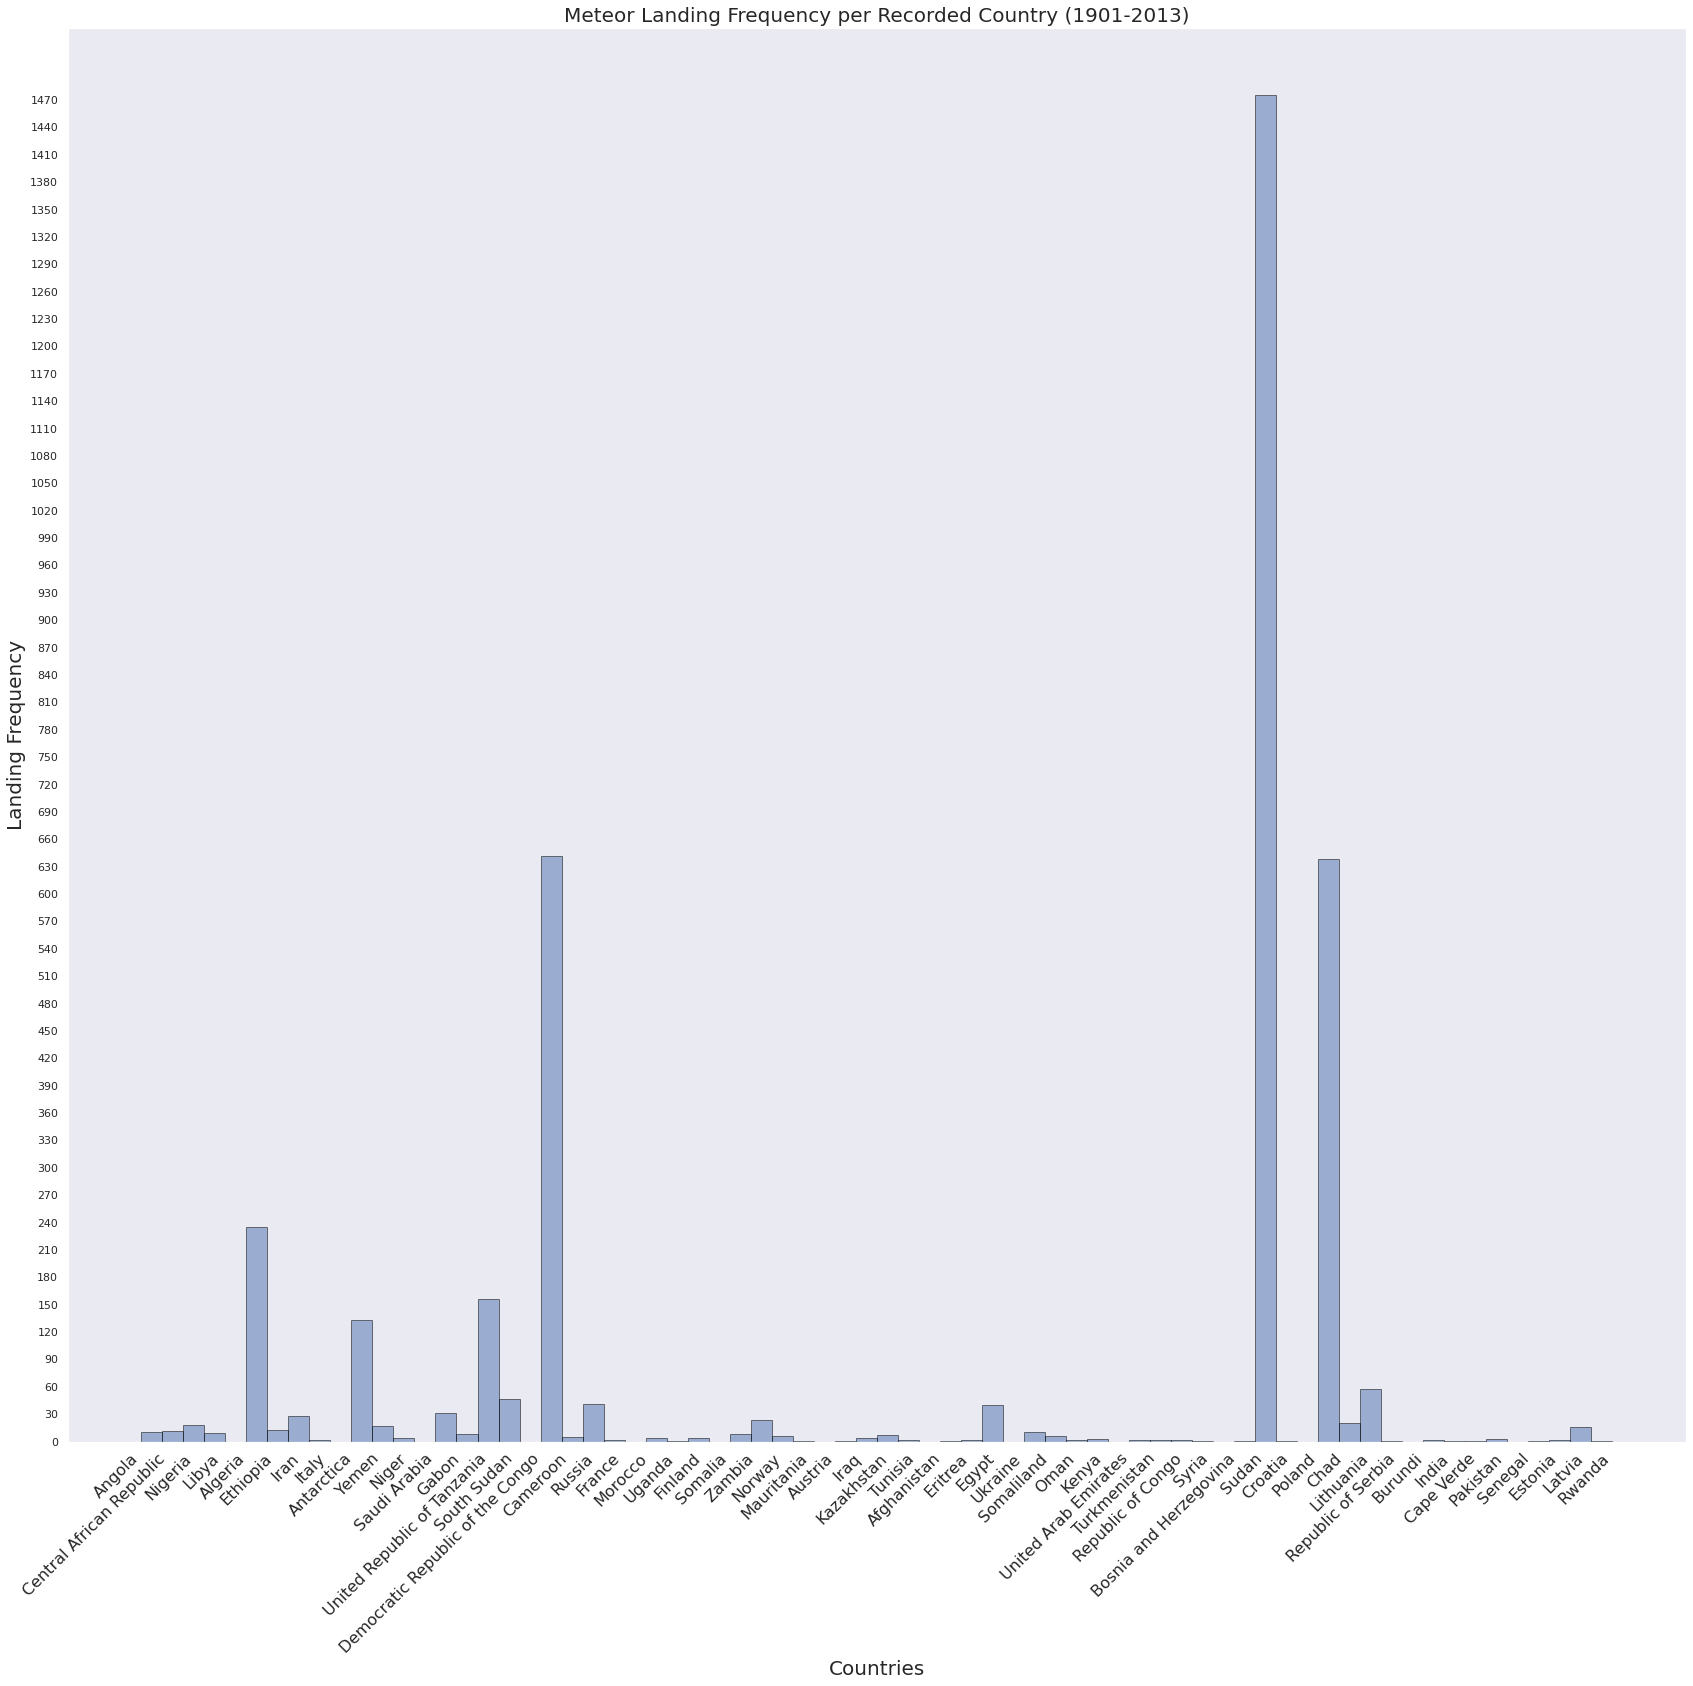

<Figure size 2088x1872 with 0 Axes>

In [257]:
# Displays bar chart to show country's with landings
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (29,26)

plt.hist(df['country'], bins=70, alpha=0.5, histtype='bar', ec='black');
plt.grid()
plt.yticks(np.arange(0, 1500, 30))

plt.xticks(
    rotation=45, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 16
)

plt.ylabel('Landing Frequency', size=20)
plt.xlabel('Countries', size=20)
plt.title('Meteor Landing Frequency per Recorded Country (1901-2013)', size=20)
plt.show()

plt.savefig("Meteor_Frequency_Countries_Plot.pdf")

> Our observation remains true. We can clearly see Sudan topping the other countries with landing counts up in the 1,470's; way bigger than the competitors. This brings up the question, why?

> We can also observe the surrounding countries, and note that Ethiopia, Cameroon, and Poland also have high counts of landings. Hmmm...I wonder what all these places have in common?

# **Creating our Map**

> Now we will display these features in an interactive map using folium as mentioned earlier. 

> This part will be a little bit different compared to the rest, as we will use [DBScan](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), an unupervised learning technique that clusters points based on two main parameters: epsilon value and min sample size.

> Hypothesis: Just by knowing the geographical regions of Poland, Cameroon, Sudan, etc., aka countries with highest landing frequencies, we can assume that the majority of our points will be classified as clusters around those countries, or the middle of the world. 

> Why DBScan? First off, DBScan stands for "density based spatial clustering of applications with noise," and the main reason we will use this is because it can recognize clusters within complex shapes. This is important, as our coordiantes are not mapped int terms of landing frequencies (if we did this, we can safely assume that we will have more distinct groups of points clustered together based on countries with a high number of landings etc.). We map all coordinates, so we will have a diverse map with coordinates from the North pole to the south with no real pattern. We will use DBScan's epislon and min points parameters to establish density clustering. This will give us noisy points (or outliers) since not every point is close to a group. This is perfectly fine for our hypothesis. 

1.   **Epsilon**: this is the the max "distance" between each point that we will allow to be considered in the same group. We can determine this through a variety of methods, such as finding an elbow graph, or calculating average distances from the model, etc., which would require more in-depth appraisal of the data. However, since we are using an old database that has not been updated since 2013, we can safely assume that just by eyeballing a good epsilon, we can tailor this value through trail-and-error to display the best outcome. For this set, we will use 0.1 as the value. 
2.   **Min sample size**: this is the minimum number of a samples a group of epsilon-contained points must have to be considered a "cluster." We will determine this through trail-and-error for the same reasons set above. Since we are dealing with a slightly larger dataset, our value will be set to 30 points.

This is favorable compared to KMeans, where the idea is to find cluster centers and reevaluate these centers after each scanning of possible points. This would work for us if our data was clearer and more favorably shaped into clusters beforehand. We will see after plotting these points that the clusters are not explicitly defined. In fact, if we zoom in on the map, we will find more expressed clusters in smaller batches, however, it would overall would just make our map very messy and unreadable. 

> Also as a sidenote, I will be plotting ALL coordinates on this map. Meaning we will have the unknown Country names mapped onto here as well as to represent a full view of all possible landings. 

In [258]:
# what we will color each cluster group on the map
cols = ['red', 'green', 'blue', 'orange', 'yellow', 'purple']

> Note: DBScan will classify each point with an index. 1+ for each cluster group.

> For example, if we have 4 defined clusters, then points in the first cluster will be labeled with 1, points in the second cluster will be labeled with 2, etc. up to 4.

> Also, if a point is considered to be an outlier, it will be given a label of -1 to distinguish it from the positive cluster groups. 

In [259]:
import folium

def mapping(df, cluster_column):
    m = folium.Map(location=[df.reclat.mean(), df.reclong.mean()], zoom_start=2)
    for index, row in df.iterrows():
      if row[cluster_column] == -1: # outliers will be left black
            cluster_colour = 'black'
      else:
            cluster_colour = cols[row[cluster_column]]
  
      folium.CircleMarker(
            location= [row['reclat'], row['reclong']],
            radius=3,
            popup= row['Description'],
            color=cluster_colour,
            fill=True,
            fill_color=cluster_colour
        ).add_to(m)
        
    return m

In [260]:
from sklearn.cluster import DBSCAN

location = list(zip(df["reclat"], df["reclong"]))
db = DBSCAN(eps=0.1, min_samples=30, algorithm='ball_tree', metric='haversine').fit(np.radians(location))

classes = db.labels_
df.insert(2, "db_labels", classes, True)
map = mapping(df, "db_labels")

map

> As we can see, the data is not predefined into nicely clustered groups. So an algorithm like KMeans would struggle with defining dense populations like these.

> We can also view 5 distinct clusters, and find that the majority of the points trend towards the center of the map.

> We can view even more so that the large landing frequencies happen on the coastline of the African and European continents, verifying our earlier hypothesis that meteroite landings frequent this part of the world more so than its edges (remember: Poland, Camaroon, and Sudan had the most frequent landings. All these countries reside in these clustered regions). 

> Note the black points, or our outliers, and how they spread from Antartica to Russia. They are near clusters, but because of our epsilon range, they are still quite far. Try zooming in to see just how far these outliers really are from the clusters. 

# **Graphing Frequencies Over a Period of Time**

> While looking at all these occurances, if we create a graph that displayed metorite landing frequency as time goes one, we will see a sudden spike around the 2000s. 

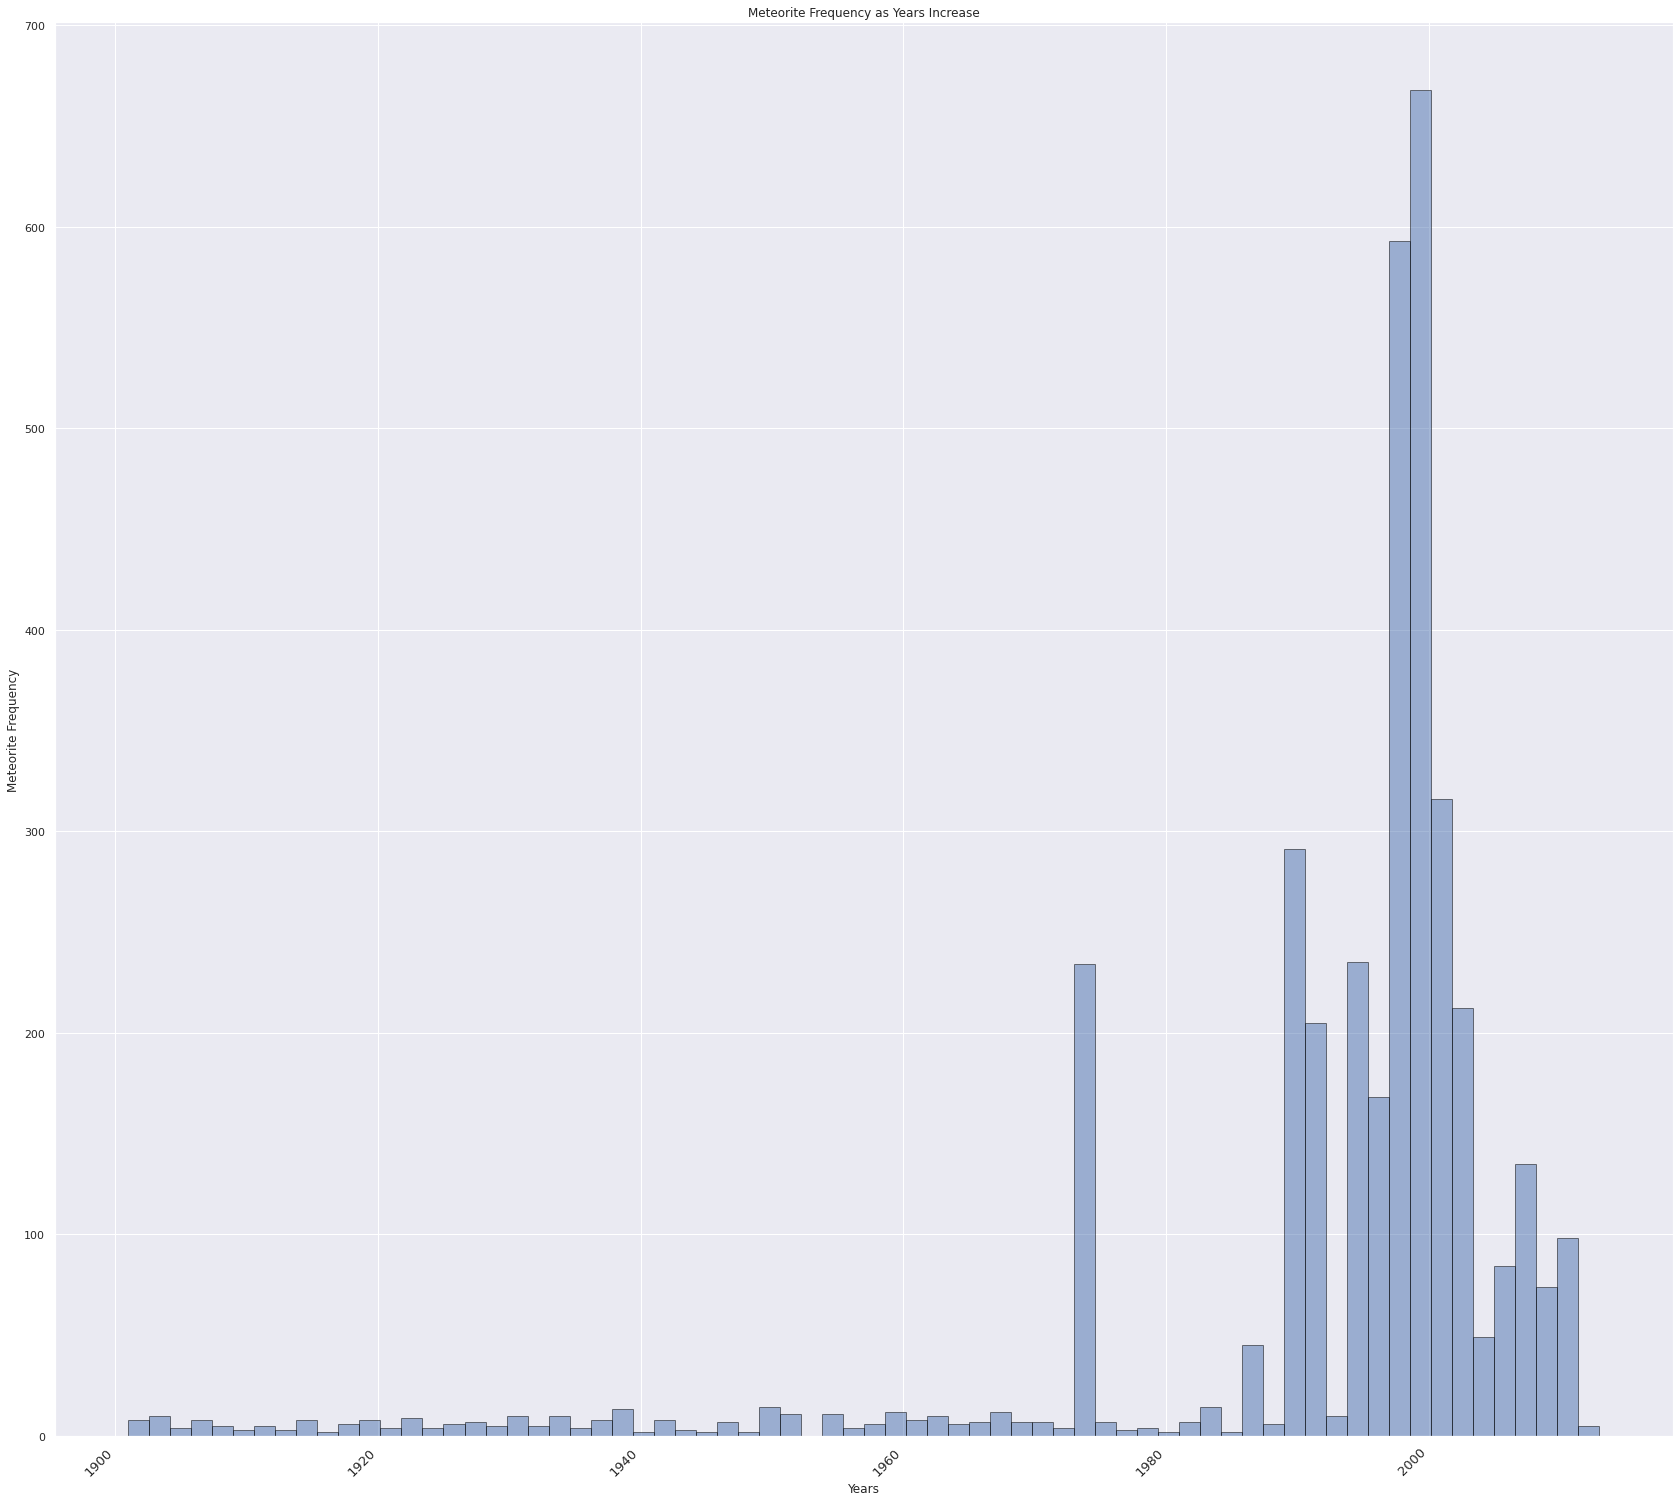

<Figure size 2088x1872 with 0 Axes>

In [261]:
plt.xticks(
    rotation=45, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 13
)

plt.hist(df['years'], bins=70, alpha=0.5, histtype='bar', ec='black')

plt.xlabel("Years");
plt.ylabel("Meteorite Frequency");
plt.title("Meteorite Frequency as Years Increase");

plt.show();

plt.savefig("Meteorite_Frequency_Plot.pdf");

> This brought up the question: what other events where occuring at that time to have caused this spike? I looked into what causes meteorites to form, and found that they come from asteroids which mainly come from supernovas. 

# **Parsing our Second Database**

> Let's see if we can find a similar correlation with frequency of supernovas.

> Note: this is a record of all observed supernovas within and out of our solar system. 

> This dataset comes with a lot of scientific and heavy-to-understand columns, so we will only concern ourselves with three.

> **Name**: the names of the supernovas.

> **Disc. Date**: the date the supernova was observed.

> **Host Name**: ID for the supernova. 

In [262]:
# lets see if there were supernovas during the years of asteroids hitting earth
df2 = pd.read_csv('The Open Supernova Catalog (1).csv', index_col=0)
df2 = df2.dropna(subset=['Disc. Date']) # dropping all null rows that dont contain a date
df2 = df2.drop(['R.A.', 'Dec.', 'Type', 'Phot.', 'Spec.', 'Radio', 'X-ray', 'mmax'], axis=1) # stuff we dont care about

In [263]:
df2

Disc. Date     Host Name
Name                              
SN2011fe  2011/08/24          M101
SN1987A   1987/02/24           LMC
SN2003dh  2003/03/31  A104450+2131
SN2013dy  2013/07/10      NGC 7250
SN2013ej  2013/07/25       NGC 628
...              ...           ...
SN1985M   1985/06/16  A220830-4830
SN1988M   1988/04/07     NGC 4496B
SN386A     386/04/30     Milky Way
SN393A     393/02/27     Milky Way
SN837A     837/04/29     Milky Way

[89617 rows x 2 columns]

> We will similarly aprse the date column into just years, as we do not care about the specific month and days.

> We will then fit our data to represent years from 1901 to 2013 to match up with the meteorite range.

In [264]:
# Lets break up year column into just years
year = list()

for index, row in df2.iterrows():
  year.append(row['Disc. Date'][:4])

In [265]:
from operator import contains
# getting rid of invalid years

df2['year'] = year
df2 = df2[df2.year.str.contains("^19|20\d{2}$")]

> Note: ^19|20\d{2}$ is a regex pattern. We use this here because the supernova database records go all the way back to triple digit years, and that would be annoying to parse out manually. The patter is looking for years from 1900-2222 with 4 digits and will get rid of anything else not meeting that critereon. 

> For more info on [regex](https://docs.python.org/3/library/re.html) and python's regex library.

> I recommend playing around with patterns using: https://regex101.com/

> This will help you create a regex pattern and test it on values for whatever you need.

In [266]:
df2

Disc. Date     Host Name  year
Name                                    
SN2011fe  2011/08/24          M101  2011
SN1987A   1987/02/24           LMC  1987
SN2003dh  2003/03/31  A104450+2131  2003
SN2013dy  2013/07/10      NGC 7250  2013
SN2013ej  2013/07/25       NGC 628  2013
...              ...           ...   ...
SN1935B   1935/04/01      NGC 3115  1935
SN1954J   1954/11/26      NGC 2403  1954
SN1982aa  1982/01/01      NGC 6052  1982
SN1985M   1985/06/16  A220830-4830  1985
SN1988M   1988/04/07     NGC 4496B  1988

[89603 rows x 3 columns]

In [267]:
#let's drop years before 1490 and after 2013 to match years in df
df2.insert(3, "years", pd.to_numeric(df2["year"]), True)
df2 = df2.drop(['year'], axis=1)
df2.loc[df2.years < 2014]

df2.head()

Disc. Date     Host Name  years
Name                                     
SN2011fe  2011/08/24          M101   2011
SN1987A   1987/02/24           LMC   1987
SN2003dh  2003/03/31  A104450+2131   2003
SN2013dy  2013/07/10      NGC 7250   2013
SN2013ej  2013/07/25       NGC 628   2013

> Let's plot a similar graph to meteorite frequency plot to see if there is also a spike in supernovas around the same years.

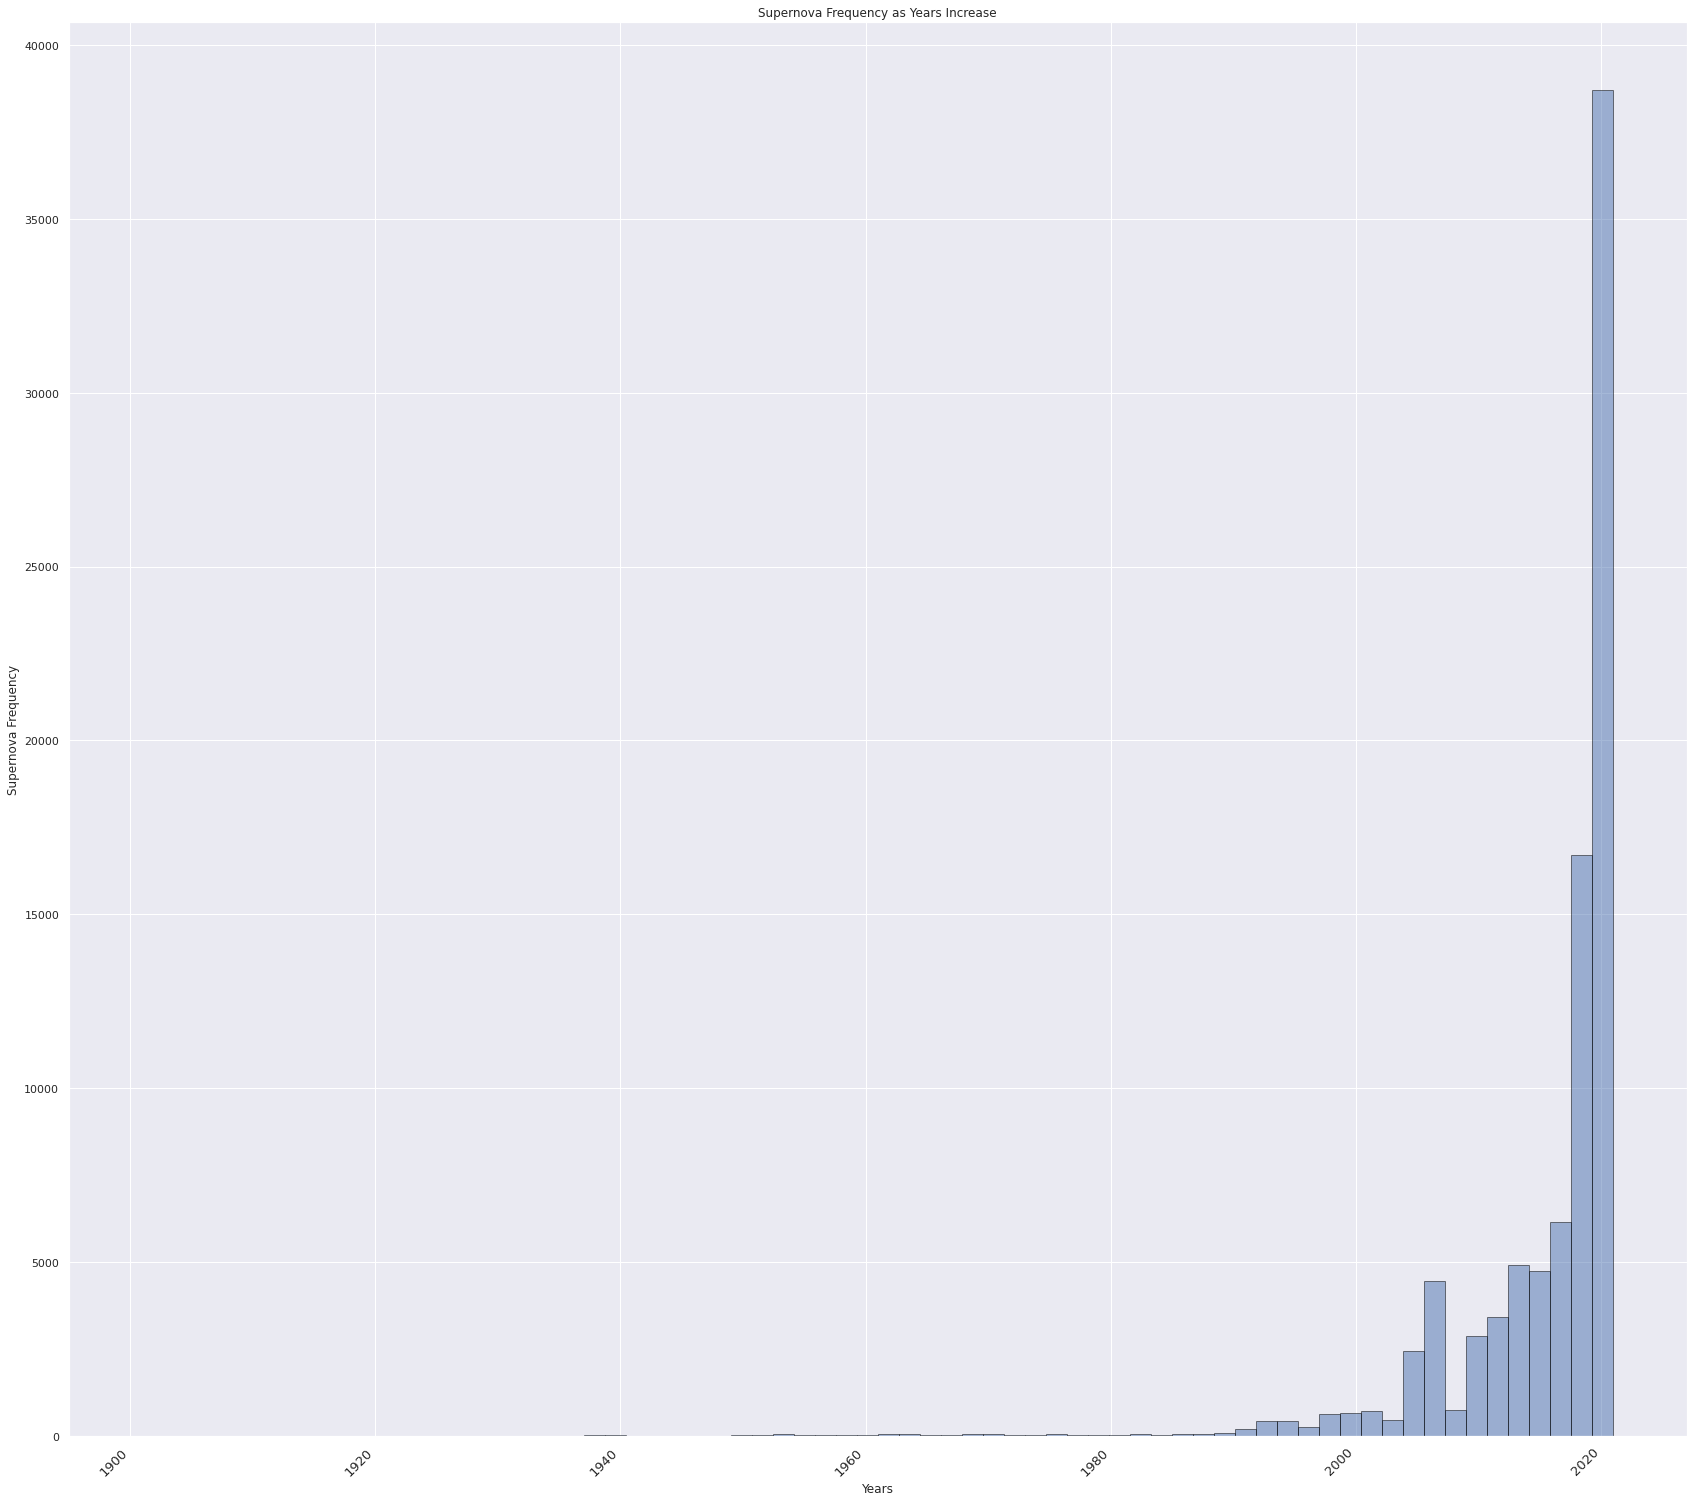

<Figure size 2088x1872 with 0 Axes>

In [268]:
plt.xticks(
    rotation=45, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 13
)

plt.hist(df2['years'], bins=70, alpha=0.5, histtype='bar', ec='black')

plt.xlabel("Years")
plt.ylabel("Supernova Frequency")
plt.title("Supernova Frequency as Years Increase")

plt.show();

plt.savefig("Supernova_Frequency_Plot.pdf")

> As we can see from the plot. There is in fact a spike around the 2000s--similar to our spike with the meteorite data.

> Let's form a hypothesis: I think that meteorites have a positive correlation with supernova happenings. 

> Let's create a linear regression model to test this out!

# **Fitting a Regression Model**

> Let's create a new dataframe that will house the meteorite landing frequencies as well as the supernova frequencies.

> We will then add a column for the years they correspond to.

In [269]:
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()

df_1["supernovas"] = df2["years"].value_counts()
df_1 = df_1.reset_index()
df_1 = df_1.rename(columns={"index": "years"})
df_1 = df_1.sort_values(by="years")


df_2["meteorites"] = df["years"].value_counts()
df_2 = df_2.reset_index()
df_2 = df_2.rename(columns={"index": "years"})
df_2 = df_2.sort_values(by="years")

df_major = pd.merge(df_1, df_2, on=["years"])

In [270]:
df_major

years  supernovas  meteorites
0    1901           2           4
1    1907           1           5
2    1912           1           1
3    1914           1           5
4    1915           1           3
..    ...         ...         ...
81   2009         882          74
82   2010        1985          63
83   2011        1734          35
84   2012        1691           4
85   2013        2486           1

[86 rows x 3 columns]

> Note: There were meteorite landings reported for every year from 1901-2013, however, I noticed that supernovas were not observed for some 20 years sprinkled throughout the timeline. This is interesting, as we will also see that meteorite frequencies were low during that time period. 

In [271]:
# fitting to linear regression equation 
import statsmodels.api as sm
from statsmodels.formula.api import ols

fit = np.polyfit(df_major["supernovas"].astype(int), df_major["meteorites"],1)
x = fit[0]
intercept = fit[1]
y = x*(df_major["supernovas"]) + intercept

print('y = {:.2f} * supernovas + ({:.2f})'.format(x, intercept))

result = ols(formula = "meteorites ~ supernovas", data=df_major).fit()
print(result.summary())

y = 0.02 * supernovas + (37.96)
                            OLS Regression Results                            
Dep. Variable:             meteorites   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.442
Date:                Mon, 20 Dec 2021   Prob (F-statistic):              0.233
Time:                        17:27:39   Log-Likelihood:                -501.32
No. Observations:                  86   AIC:                             1007.
Df Residuals:                      84   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.959

> All (pvalues) parameters in the model are not significant from zero, as they are less than 0.05, and with the closest being Supernovas (which is expected since it expresses higher frequencies compared to meteorites) but still not significantly different from zero. 

In [272]:
result.params

Intercept     37.959496
supernovas     0.019121
dtype: float64

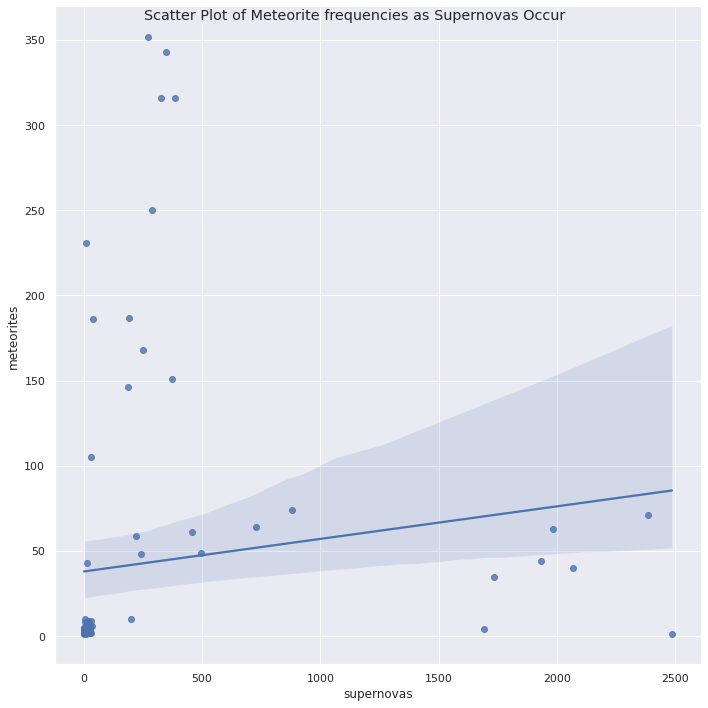

In [273]:
sns.set(rc = {'figure.figsize':(20,8)})
ax = sns.lmplot(x="supernovas", y="meteorites", data=df_major, height=10);

ax.fig.suptitle("Scatter Plot of Meteorite frequencies as Supernovas Occur");

plt.savefig("Scatter_Super_and_Meteor_Plot.pdf")

> We can observe an increase in meteorites as supernovas increase, around 0.019121 average per year. A small, but positive correlation!

> Therefore, our hypothesis remains to be true. We can clearly see a linear relationship between these two events.

# **Conclusion**

> Here we learned some interesting statistics about meteorites and just how many of them land on our planet. We saw how they tended to trend towards the center of the world (so keep that in mind if you plan to live there and fear getting hit by these big rocks!) and we saw the correlation between something that is so out-of-this-world with a phenomena that occurs annually. 

> We used unsupervised and supervised learning methods (DBScan and Regression respectively) to obtain analysis from these events to futher look into any types of relationships that can be spotted from the landing trends and the origins from occurances. 

> Hopefully, this tutorial has introduced you to a lot of of python's strengths, and showed the many way you can obtain analysis from data. From regex to reverse-engineering geocoordinates using shapely and APIs, we found out that meteorites tend to land on the coasts of Africa and Europe as well as the US. We also figured out that supernovas do indeed lead to the formation of some of these meteorites.

> Thanks for reading!